# Stock Market Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
...,...,...,...,...,...,...,...,...
1230,14-10-2013,160.85,161.45,157.70,159.30,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.80,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.30,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.30,155.55,2049580,3204.49


In [3]:
df.shape

(1235, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

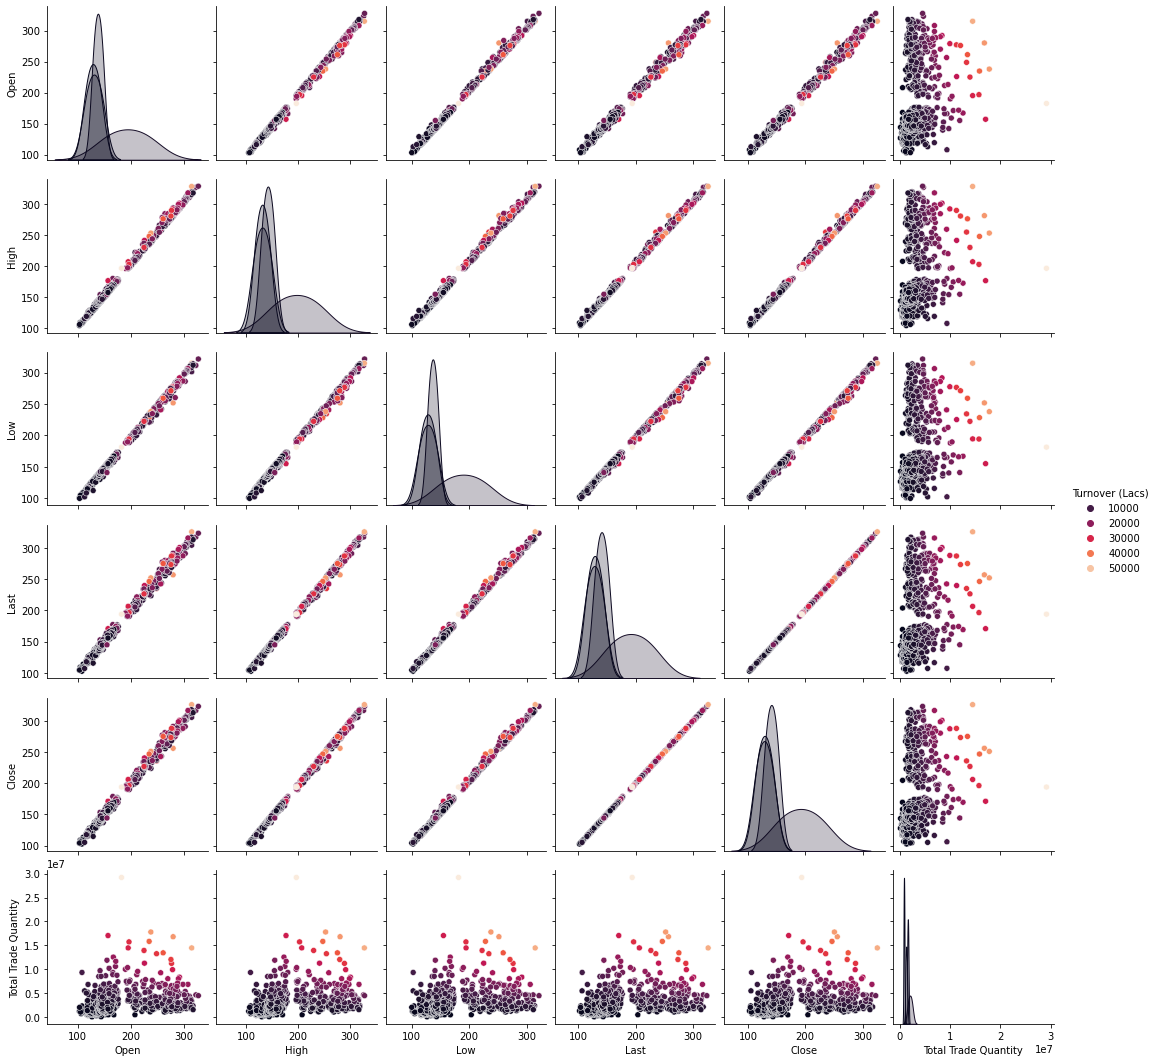

In [7]:
sns.pairplot(df,hue='Turnover (Lacs)',palette="rocket")
plt.show()

In [8]:
df_close=df.reset_index()['Close']
df_close

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

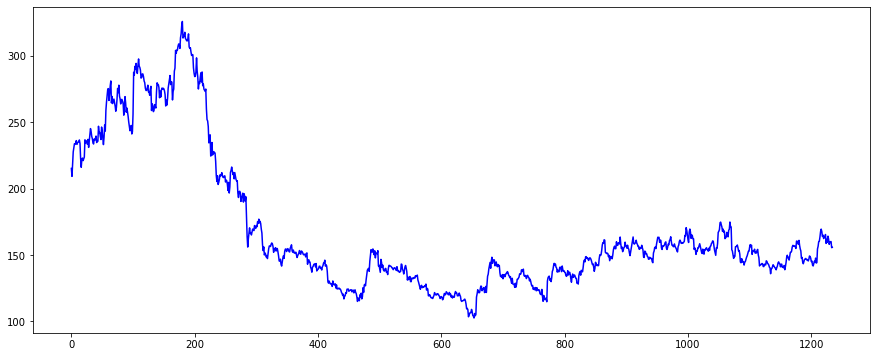

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df_close,c="b")
plt.show()

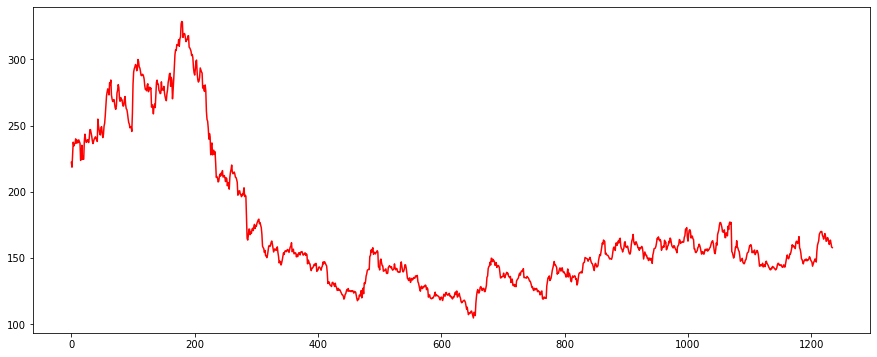

In [10]:
plt.figure(figsize=(15,6))
df_high=df.reset_index()['High']
plt.plot(df_high,c="r")
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_high=scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [12]:
df_high.shape

(1235, 1)

In [13]:
df_high

array([[0.52487174],
       [0.508588  ],
       [0.54963194],
       ...,
       [0.25072496],
       [0.23912559],
       [0.23734107]])

In [14]:
training_size=int(len(df_high)*0.75)
test_size=len(df_high)-training_size
train_data,test_data=df_high[0:training_size,:],df_high[training_size:len(df_high),:1]

In [15]:
training_size,test_size

(926, 309)

In [16]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)


In [17]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [19]:
print(x_train.shape),print(y_train.shape)

(825, 100, 1)
(825,)


(None, None)

In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [21]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 13s 281ms/step - loss: 0.0494 - val_loss: 0.0044
Epoch 2/100
13/13 [==============================] - 2s 174ms/step - loss: 0.0076 - val_loss: 0.0021
Epoch 3/100
13/13 [==============================] - 2s 175ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 4/100
13/13 [==============================] - 2s 167ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 2s 161ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/100
13/13 [==============================] - 2s 166ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 7/100
13/13 [==============================] - 2s 167ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/100
13/13 [==============================] - 2s 163ms/step - loss: 0.0019 - val_loss: 9.9766e-04
Epoch 9/100
13/13 [==============================] - 2s 168ms/step - loss: 0.0017 - val_loss: 9.7897e-04
Epoch 10/100
13/13 [==============================] - 2s 190ms/step - loss: 0.0016

13/13 [==============================] - 3s 217ms/step - loss: 4.6486e-04 - val_loss: 3.6515e-04
Epoch 78/100
13/13 [==============================] - 3s 221ms/step - loss: 4.4223e-04 - val_loss: 3.6056e-04
Epoch 79/100
13/13 [==============================] - 3s 201ms/step - loss: 4.6053e-04 - val_loss: 5.9021e-04
Epoch 80/100
13/13 [==============================] - 3s 202ms/step - loss: 4.3981e-04 - val_loss: 3.4572e-04
Epoch 81/100
13/13 [==============================] - 3s 202ms/step - loss: 4.1594e-04 - val_loss: 3.3874e-04
Epoch 82/100
13/13 [==============================] - 3s 198ms/step - loss: 4.3340e-04 - val_loss: 3.3791e-04
Epoch 83/100
13/13 [==============================] - 3s 212ms/step - loss: 4.0842e-04 - val_loss: 5.4560e-04
Epoch 84/100
13/13 [==============================] - 3s 215ms/step - loss: 4.5898e-04 - val_loss: 3.3154e-04
Epoch 85/100
13/13 [==============================] - 3s 208ms/step - loss: 3.7210e-04 - val_loss: 3.4844e-04
Epoch 86/100
13/13 [===

In [25]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
math.sqrt(mean_squared_error(y_train,train_predict))

176.04601532103976

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

154.06985698176703

In [29]:
look_back=100
trainPredictPlot=np.empty_like(df_high)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df_high)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_high)-1,:]=test_predict

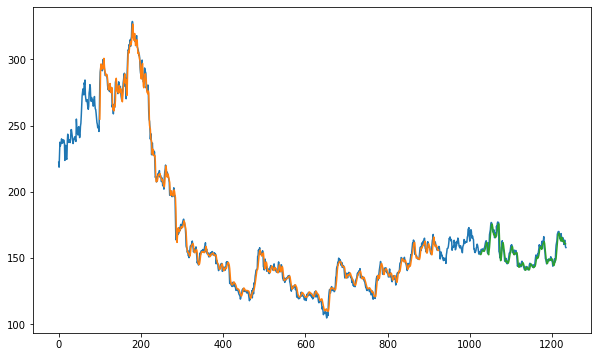

Green indices the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [30]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
print("Green indices the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [31]:
len(test_data),x_test.shape

(309, (208, 100, 1))

In [32]:
x_input=test_data[209:].reshape(1,-1)
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=100
nextNumberOfDays=28
i=0
while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} data output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.23851906]
101
1day input [0.16640642 0.17376757 0.17131385 0.17131385 0.16662949 0.16573723
 0.16216819 0.16395271 0.16863707 0.17956725 0.18425162 0.18402855
 0.1780058  0.1780058  0.17711354 0.17956725 0.17443676 0.17109079
 0.17131385 0.17912112 0.17755967 0.17131385 0.17979032 0.19295115
 0.20410439 0.2123578  0.20298907 0.19942003 0.20365826 0.2154807
 0.21525764 0.22261878 0.23287977 0.24693286 0.24046398 0.24403301
 0.23912559 0.2409101  0.23377203 0.25496319 0.25897836 0.25384787
 0.25117109 0.25987062 0.27436984 0.23667187 0.23154138 0.21971894
 0.19986616 0.19696632 0.18960518 0.1824671  0.19138969 0.19562793
 0.19339728 0.19808164 0.19852777 0.19250502 0.19674325 0.19540486
 0.19942003 0.20655811 0.20298907 0.1951818  0.19183582 0.18826679
 0.17465983 0.18112871 0.18826679 0.19272808 0.1989739  0.1951818
 0.18871292 0.22484943 0.24559447 0.25273255 0.26053982 0.28240018
 0.28708454 0.29087665 0.2917689  0.29132277 0.27883114 0.27392371
 0.26589337 0.27503904 0.28463083 0.

9 data output [[0.2208526]]
10day input [0.17956725 0.18425162 0.18402855 0.1780058  0.1780058  0.17711354
 0.17956725 0.17443676 0.17109079 0.17131385 0.17912112 0.17755967
 0.17131385 0.17979032 0.19295115 0.20410439 0.2123578  0.20298907
 0.19942003 0.20365826 0.2154807  0.21525764 0.22261878 0.23287977
 0.24693286 0.24046398 0.24403301 0.23912559 0.2409101  0.23377203
 0.25496319 0.25897836 0.25384787 0.25117109 0.25987062 0.27436984
 0.23667187 0.23154138 0.21971894 0.19986616 0.19696632 0.18960518
 0.1824671  0.19138969 0.19562793 0.19339728 0.19808164 0.19852777
 0.19250502 0.19674325 0.19540486 0.19942003 0.20655811 0.20298907
 0.1951818  0.19183582 0.18826679 0.17465983 0.18112871 0.18826679
 0.19272808 0.1989739  0.1951818  0.18871292 0.22484943 0.24559447
 0.25273255 0.26053982 0.28240018 0.28708454 0.29087665 0.2917689
 0.29132277 0.27883114 0.27392371 0.26589337 0.27503904 0.28463083
 0.27570823 0.2587553  0.25964756 0.27102387 0.26946241 0.26009369
 0.24804818 0.2536248  

17 data output [[0.20878817]]
18day input [0.17109079 0.17131385 0.17912112 0.17755967 0.17131385 0.17979032
 0.19295115 0.20410439 0.2123578  0.20298907 0.19942003 0.20365826
 0.2154807  0.21525764 0.22261878 0.23287977 0.24693286 0.24046398
 0.24403301 0.23912559 0.2409101  0.23377203 0.25496319 0.25897836
 0.25384787 0.25117109 0.25987062 0.27436984 0.23667187 0.23154138
 0.21971894 0.19986616 0.19696632 0.18960518 0.1824671  0.19138969
 0.19562793 0.19339728 0.19808164 0.19852777 0.19250502 0.19674325
 0.19540486 0.19942003 0.20655811 0.20298907 0.1951818  0.19183582
 0.18826679 0.17465983 0.18112871 0.18826679 0.19272808 0.1989739
 0.1951818  0.18871292 0.22484943 0.24559447 0.25273255 0.26053982
 0.28240018 0.28708454 0.29087665 0.2917689  0.29132277 0.27883114
 0.27392371 0.26589337 0.27503904 0.28463083 0.27570823 0.2587553
 0.25964756 0.27102387 0.26946241 0.26009369 0.24804818 0.2536248
 0.2625474  0.25072496 0.23912559 0.23734107 0.23851906 0.234051
 0.23139679 0.22955665 0.

25 data output [[0.19737098]]
26day input [0.2123578  0.20298907 0.19942003 0.20365826 0.2154807  0.21525764
 0.22261878 0.23287977 0.24693286 0.24046398 0.24403301 0.23912559
 0.2409101  0.23377203 0.25496319 0.25897836 0.25384787 0.25117109
 0.25987062 0.27436984 0.23667187 0.23154138 0.21971894 0.19986616
 0.19696632 0.18960518 0.1824671  0.19138969 0.19562793 0.19339728
 0.19808164 0.19852777 0.19250502 0.19674325 0.19540486 0.19942003
 0.20655811 0.20298907 0.1951818  0.19183582 0.18826679 0.17465983
 0.18112871 0.18826679 0.19272808 0.1989739  0.1951818  0.18871292
 0.22484943 0.24559447 0.25273255 0.26053982 0.28240018 0.28708454
 0.29087665 0.2917689  0.29132277 0.27883114 0.27392371 0.26589337
 0.27503904 0.28463083 0.27570823 0.2587553  0.25964756 0.27102387
 0.26946241 0.26009369 0.24804818 0.2536248  0.2625474  0.25072496
 0.23912559 0.23734107 0.23851906 0.234051   0.23139679 0.22955665
 0.22799627 0.22652695 0.22509664 0.22368531 0.22227573 0.2208526
 0.21940601 0.2179325

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,129)

In [35]:
day_new.shape

(100,)

In [37]:
day_pred.shape

(28,)

In [38]:
df1=df_high.tolist()
df1.extend(lst_output)

In [39]:
len(df_high)

1235

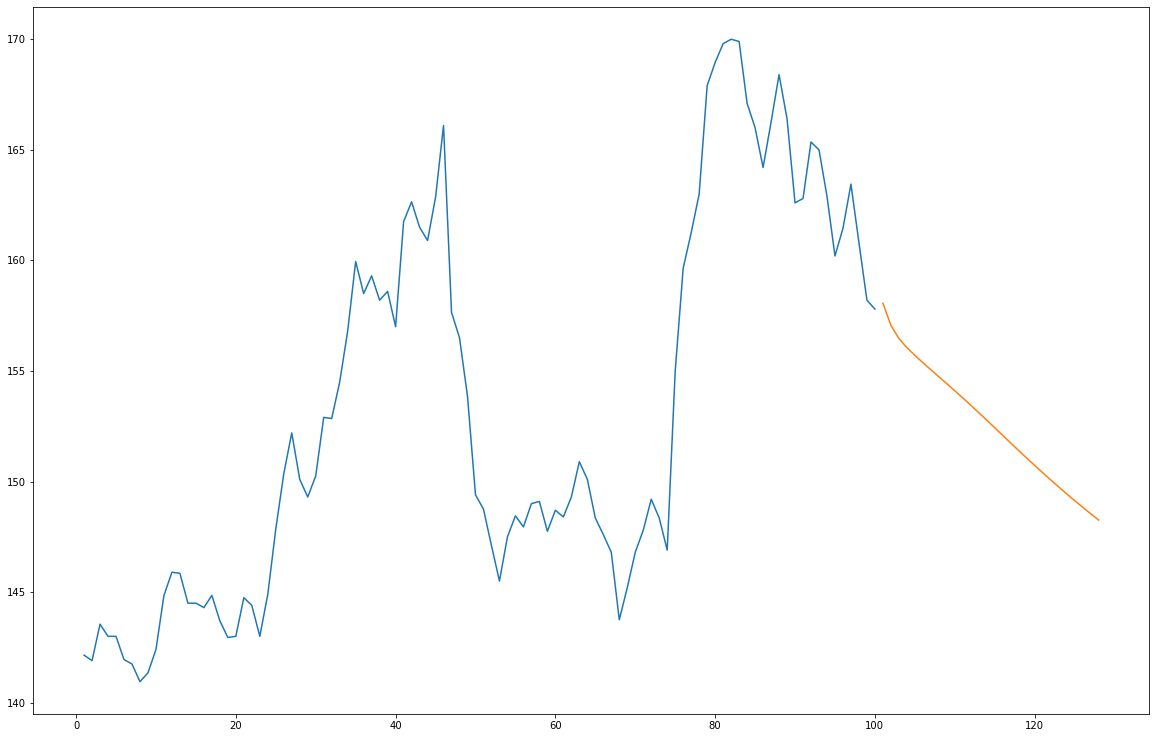

In [43]:
plt.figure(figsize=(20,13))
plt.plot(day_new,scaler.inverse_transform(df_high[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

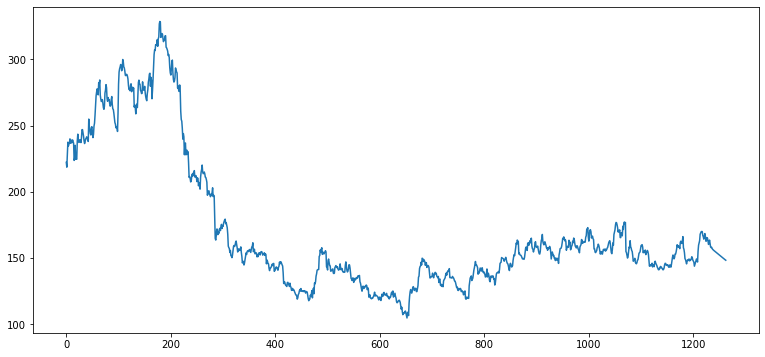

In [44]:
plt.figure(figsize=(13,6))
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.show()